# Classification and decision boundaries
In this exercise you will be experimenting with linear classification, including visualization of decision boundaries. Noteably, the parameters of the decision boundary will not be learned with least squares but instead adjusted manually (or randomly). 


In [4]:
import numpy as np  # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools

## Linear Decision boundary
### Generating data points
In the following section you will be experimenting with a standard linear classifier, eg. $\mathbf{y} = \text{sign}(\mathbf{w}^\top\mathbf{x})$, where $\mathbf{w}$ is the model parameters.
The cell below generates random data to be used for classification. 


In [5]:
np.random.seed(42)  ## generate the same sequence of random points
# Generate 2 clusters of data, by drawing from a normal distribution.
S = np.eye(2)  ## covariance matrix, set to indenty matrix i.e. x,y independent. 
p_pos = np.random.multivariate_normal([1, 1], S, 40)
p_neg = np.random.multivariate_normal([-1, -1], S, 40)
## 40 points (x,y) coordinates
p_pos.shape

(40, 2)

The data of the positive and negative classes are stored in the variables `p_pos`
 and `p_neg`
, respectively


The next cell visualizes the two classes. 


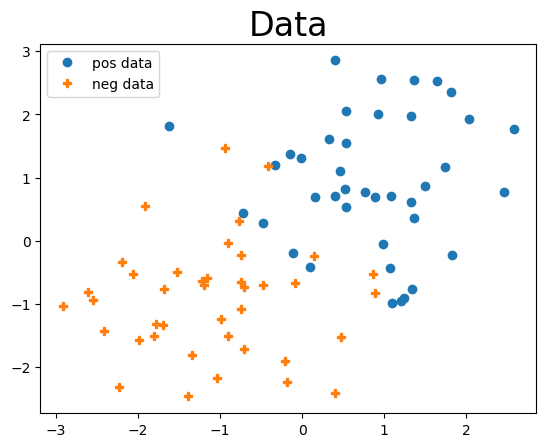

In [6]:
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
plt.title("Data", fontsize=24)
plt.legend();

In the following section, you will manually experiment with changing the model parameters of a linear decision boundary and visualize the results.

---
**Task 1 (easy): Linear decision boundary👩‍💻**
1. Implement the function `linear_boundary`
 that, given an x-coordinate and the model parameters, returns the y-value according to the formula


$y = w_1 x + w_0$

2. Use the function `linear_boundary`
 to generate the points of the decision boundary with `xb`
 (following $y = w_1 x + w_0$ ). The decision boundary is specified by your choice of model parameters.

3. Which choice of model parameters seems (visually) to best separate the two classes? 



---

3. It semms like the parameters $w_1 = -0.5 w_0 = -1$ gives the best decision boundary

In [7]:
# 1
def linear_boundary(x, w):
    """
    :param x: x values of the line.
    :param w: List of model parameters [bias, slope] of the line.
    
    :return: y-values of the boundary / line .
    """
    ones = np.ones(len(x))
    x = np.column_stack((ones, x))

    return np.dot(x, w)

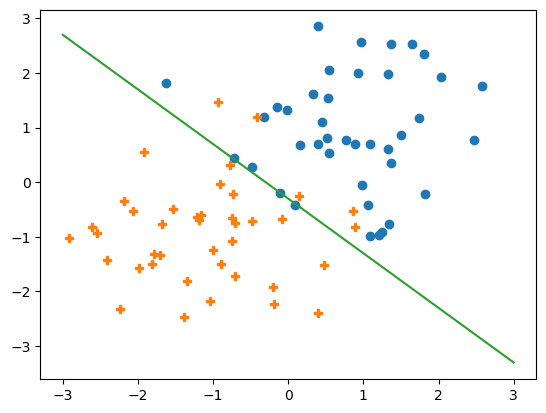

In [47]:
# 2
# plotting the data points and decision boundary
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
xb = np.linspace(-3, 3, 100)
# Write solutions here
ax.plot(xb, linear_boundary(xb, np.array([[-0.3], [-1]])), label='decision boundary')
# ax.plot(xb, linear_boundary(xb, np.array([[-0.7], [0.65]])), label='decision boundary')

The prediction function predicts the class of the data points based on the y-value of the data point compared to the y-values of the decision boundary.


---
**Task 2 (easy): Prediction function👩‍💻**
1. Implement the function `predict`
 that predicts the `class`
 of a point (whether the points belong to the `neg`
 or `pos`
 class) using the `linear_boundary`
 function.

2. Implement the function `accuracy`
 that compares the _predicted class_ to the _actual class_ of given data points. The function should return the fraction of $\frac{\#Correct}{\#All Points}$.

3. Which parameter values provide the largest fraction of correct predictions?

4. Is a linear decision boundary a good model to separate the two groups of data? 



---


4. the model does have a high accuracy, which indicates that it does a decent job of separating the two classes, but we also see a lot of overlap in certain areas. This overlap could indicate that a more complex model might capture this overlap better. This becomes clearer with more data.

In [9]:
# 1
def predict(w, p):
    """
    :param w: parameters of your decision function.
    :param p: The data points to predict.
    
    :return: array where 0 if `neg` class / 1 if `pos` class.
    """
    x = p[:, 0]
    y = p[:, 1]
    boundary = linear_boundary(x, w)

    return [0 if p[i][1] < boundary[i] else 1 for i in range(len(boundary))]

# 2
def accuracy(predictions,targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
     
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    filtered_predictions = list(filter(lambda p: p == targets[0], predictions))

    return len(filtered_predictions) / len(targets)

In [10]:
# 3
# print accuracy 
w_final = np.array([[-0.3], [-1]])

p_pos_accuracy = accuracy(predict(w_final, p_pos), [1 for _ in range(len(p_pos))])
p_neg_accuracy = accuracy(predict(w_final, p_neg), [0 for _ in range(len(p_neg))])

print(f'Accuracy of positive points p_pos predictions: {p_pos_accuracy}')
print(f'Accuracy of negative points p_neg predictions: {p_neg_accuracy}')

Accuracy of positive points p_pos predictions: 0.95
Accuracy of negative points p_neg predictions: 0.875



---
**Task 3 (medium): Random Search Optimization👩‍💻**
The goal of this exercise is to implement the function `random_optimization`
 that utilizes randomly chosen model parameters to search for the linear decision boundary in the binary dataset.
1. Implement the function `random_optimization`
:
    - In the function template, initialize best_params (remember it is a list) and best_score with the value zero.
    - Create the targets for the data (1s for `p_pos`
 and 0s for `p_neg`
)
    - Run `num_iterations`
 iterations and use `np.random.randn()`
 to generate new random parameters during each iteration.
    - Predict the classes of the data using the function `predict`
.
    - Evaluate the performance of the random parameters with the `accuracy`
 function.
    - Compare the accuracy achievied with the current parameters to the best parameters and update the best choice accordingly.
    - Return the best parameters and their accuracy.


2. Find the best parameters, by executing `random_optimization`
. Pass the necessary `decision_function`
 and `accuracy`
, along with the dataset and set `num_iterations`
 to 50.

3. Visualize Decision Boundary:
    - Set up a visualization using Matplotlib, plotting your 2-class dataset points.
    - Plot the optimal decision boundary based on the parameters found.


4. Analysis:
    - Based on the results, determine if a linear decision boundary is suitable for your dataset.
    - Discuss the efficiency of random search in optimizing the decision boundary and its limitations.




---

4. Answers
    - While it does achieve high accuracy, looking at the data we do seem to have a region of negative points incorrectly identified as positive points (above a below the 4 blue points close to the line), which might be captured in a more complex model
    - Given the relatively simple space of model parameters for a linear model, a random search has a high likelihood of finding efficient model parameters. This can be seen as using 50 iterations and 1000 iterations have negligible score differences

Accuracy of random search: 0.9375
Model parameters (w) random search: [-0.69716831 -1.34964373]


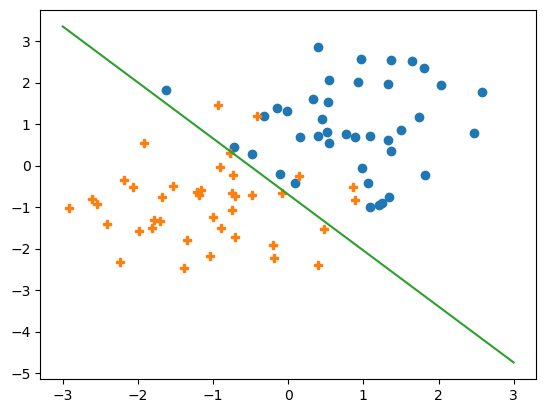

In [41]:
def random_optimization(pos, neg, num_iterations=1000):
    """
    Performs a random search optimization to find the best decision boundary for a 2-class dataset.
    :param data: The dataset, structured as [positive examples, negative examples].
    :param num_iterations: Number of random configurations to test.

    :return: The best parameters found and their score.
    """
    best_params = []
    best_score = 0

    ps = [1 for _ in range(len(pos))]
    ns = [0 for _ in range(len(neg))]

    for _ in range(num_iterations):
        w = np.random.randn(2)
        pos_predictions = predict(w, pos)
        neg_predictions = predict(w, neg)
        score = (accuracy(pos_predictions, ps) + accuracy(neg_predictions, ns)) / 2.0

        if score > best_score:
            best_score = score
            best_params = w

    return (best_params, best_score)

# w_random, accuracy_random = random_optimization(p_pos, p_neg, num_iterations=50)
w_random, accuracy_random = random_optimization(p_pos, p_neg)

print(f'Accuracy of random search: {accuracy_random}')
print(f'Model parameters (w) random search: {w_random}')

fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
xb = np.linspace(-3, 3, 100)
# Write solutions here
ax.plot(xb, linear_boundary(xb, np.array([w_random[0], w_random[1]])), label='decision boundary')


## Non-linear decision boundary
The following section experiments with a different dataset (see visualization in the cell below), where a straight line cannot seperate the different classes in the data. 


In [42]:
### Data generation
q1 = np.random.multivariate_normal([0, 0], [[.5, 0], [0, .5]], 400)

t = np.linspace(0, 2 * np.pi, 400)  ##  
q2 = np.array([(3 + q1[:, 0]) * np.sin(t), (3 + q1[:, 1]) * np.cos(t)]).T

The data of the two classes (`class 1`
 and `class 2`
) are stored in the variables `q1`
 and `q2`
, respectively.


The following cell visualize the dataset of the two classes. `class 1`
 is labelled with 0s and `class 2`
 with 1s.


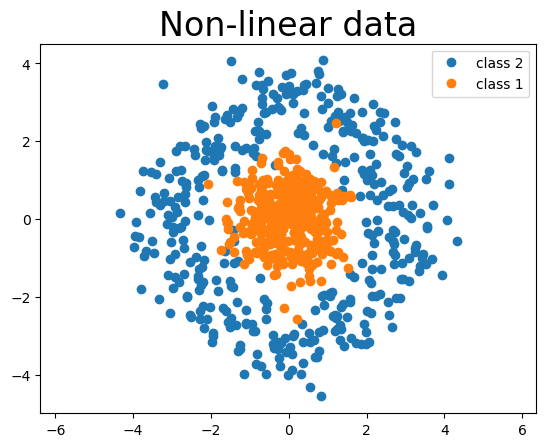

In [43]:
fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='class 2')
ax.plot(q1[:, 0], q1[:, 1], "o", label='class 1')

plt.title("Non-linear data", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()


---
**Task 4 (easy): Non-linear data👩‍💻**
1. What is the best accuracy you can achieve if you attempt to predict the class of the data with a straight line? (Use your implementation from [Task 1](#linear) )

2. Instead of a straight line, use the parametric equation of a circle ([described in detail here](https://mathopenref.com/coordparamcircle.html)
):

$$ 
    x = r\sin(t)\\
    y = r\cos(t)
    $$
to create the function `circle_boundary`
 that, given `t`
 (array of angles) and the radius `r`
 as input, returns the $x$- and $y$-coordinates of the circle.

**Tip**
Use the already provided `t`
 to plot a circular boundary.




---

Accuracy of a linear model obtained by random search: 0.66875
Model parameters (w) obtained by random search: [-1.4294597  -0.45082341]


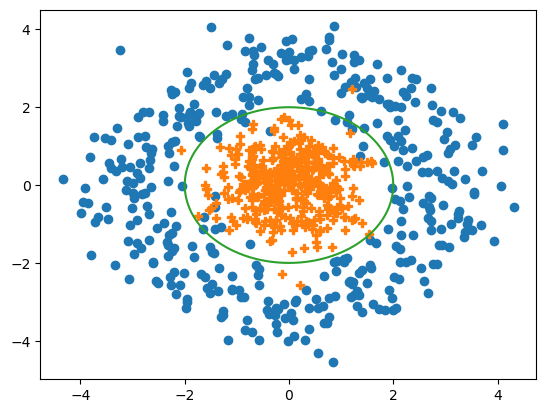

In [50]:
# 1
w_random, accuracy_random = random_optimization(q1, q2)

print(f'Accuracy of a linear model obtained by random search: {accuracy_random}')
print(f'Model parameters (w) obtained by random search: {w_random}')

# 2
t = np.linspace(0, 2 * np.pi, 400)  ### create 400 points in the range 0 ->2*pi (angles in radian units) 

def circle_boundary(t, radius):
    """
    :param t: angle data points of the circle. 
    :param radius: radius of the circle
    :return: (x-values,y-values) of the circle points .
    """
    x = radius * np.cos(t)
    y = radius * np.sin(t)

    return x, y

fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='class 2')
ax.plot(q1[:, 0], q1[:, 1], "P", label='class 1')

# plot the circle here
radius = 2
ax.plot(circle_boundary(t, radius)[0], circle_boundary(t, radius)[1], label='circle boundary')


---
**Task 5 (easy): Predict non-linear data👩‍💻💡**
1. Which choice of radius seems (visually) to best separate the two classes?
2. Could the decision boundary from above be learned by a linear model? 


**Tip**
A Linear model in machine learning refers to being linear in the parameters. 

3. Modify the `predict`
 function from [Task 2](#predict) to return the estimated class of the datapoint using a circlular decision boundary (simply the radius).
4. Use the function `accuracy`
 to get the fraction of correctly predicted data points.


**Tip**
Separating the classes can be done if your predict based on whether $x^2+y^2$ is $>r^2$ or $<r^2$


---

1. Somewhere around 2
2. Yes, as linear models operate with 1 unknown, which here would be the radius TODO: add a more mathematical explanation, see: https://www.youtube.com/watch?v=4J30jzc3DD8&ab_channel=CharlieCo and [DW] p. 116

In [62]:
# 3, 4
def predict_circle(radius, data, class_identifier):
    """
    :param radius: radius of the circular decision boudary.
    :param data: List containing the two classes of data points.
    
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    x = data[:, 0]
    y = data[:, 1]
    predictions = []

    for i in range(len(x)):
        if x[i] ** 2 + y[i] ** 2 < radius ** 2:
            predictions.append(1)
        else:
            predictions.append(0)

    return len(list(filter(lambda p: p == class_identifier, predictions))) / len(data)

# Write your implementation here
q1_accuracy = predict_circle(radius, q1, 1)
q2_accuracy = predict_circle(radius, q2, 0)

print(f'Accuracy of class q1 predictions: {q1_accuracy}')
print(f'Accuracy of class q2 predictions: {q2_accuracy}')

(400, 2)
(400, 2)
Accuracy of class q1 predictions: 0.99
Accuracy of class q2 predictions: 0.9525
